<a href="https://colab.research.google.com/github/veera37/data-science-assignments/blob/main/Assignment4_MLR_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:

#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [99]:
stup = pd.read_csv('/content/50_Startups.csv')
stup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [100]:
stup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [101]:
stup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

**corelation matrix**

In [102]:
stup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


scatterplot and histograms

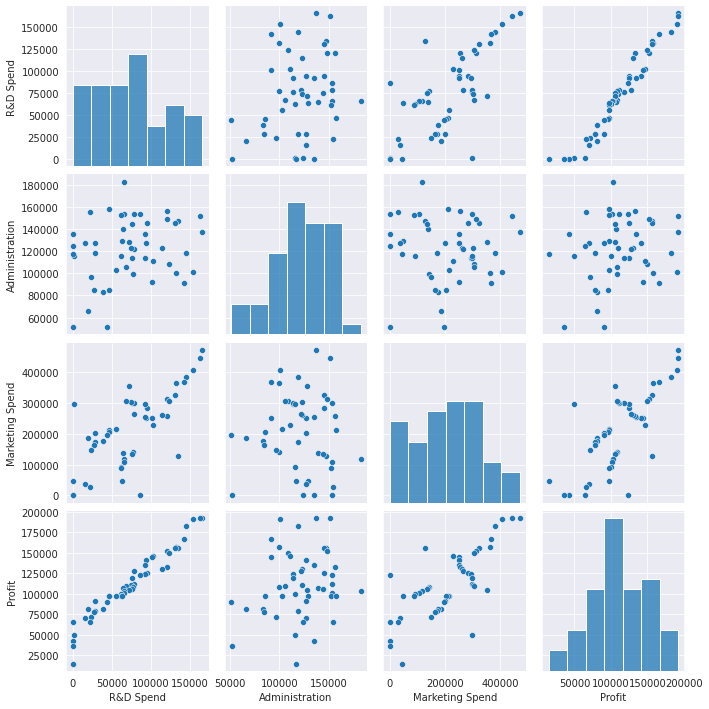

In [103]:
sns.set_style(style='darkgrid')
sns.pairplot(stup)

In [104]:
stup = stup.rename({'R&D Spend':'RD','Marketing Spend':'Mrkt',
                    'Administration':'Admin'},axis=1)
stup.head()

,RD,Admin,Mrkt,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [105]:
stup = stup.drop("State",axis=1)
stup.head()

,RD,Admin,Mrkt,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


preparing a model

In [106]:
model =smf.ols('Profit~RD+Admin+Mrkt',data = stup).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        12:25:05   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mrkt           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In model1 we can see that there is a good r^2 value. but the p values of the Admin and Mkrt are not significant. there is a multi colinearity issues.

simple linear regression model

In [107]:
sl_admin = smf.ols('Profit~Admin',data = stup).fit()
print(sl_admin.tvalues, '\n', sl_admin.pvalues)  

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [108]:
sl_Mrkt=smf.ols('Profit~Mrkt',data = stup).fit()
print(sl_Mrkt.pvalues, '\n\n' , sl_Mrkt.tvalues)

Intercept    4.294735e-10
Mrkt         4.381073e-10
dtype: float64 

 Intercept    7.808356
Mrkt         7.802657
dtype: float64


In [109]:
model2 = smf.ols('Profit~Admin+Mrkt',data = stup).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.50e-10
Time:                        12:25:05   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Admin          0.3237      0.131      2.468      0.017       0.060       0.588
Mrkt           0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

calculating variance inflation factor

In [110]:
rsq_RD = smf.ols('RD~Mrkt+Admin',data = stup).fit().rsquared
vif_RD = 1/(1-rsq_RD)
rsq_MT = smf.ols('Mrkt~RD+Admin',data = stup).fit().rsquared
vif_MT = 1/(1-rsq_MT)
rsq_AD = smf.ols('Admin~RD+Mrkt',data = stup).fit().rsquared
vif_AD = 1/(1-rsq_AD)

data = {'variable':['RD_Spend','Marketing','Administration_spend'],'vif value':[vif_RD,vif_MT,vif_AD]}
pd.DataFrame(data)



,variable,vif value
0,RD_Spend,2.468903
1,Marketing,2.326773
2,Administration_spend,1.175091


**Residual Analysis**

checking for normality by QQ plot

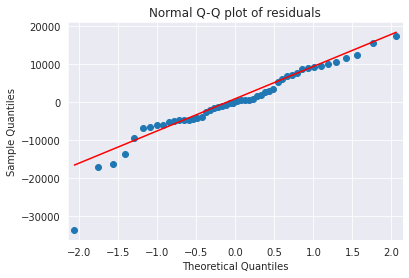

In [111]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [112]:
list(np.where(model1.resid<-30000))

[array([49])]

model for homoscadasity

In [113]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

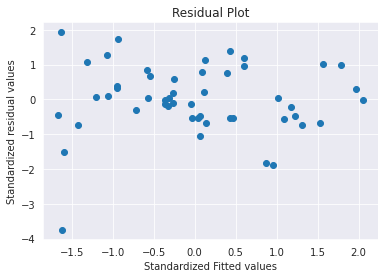

In [114]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

\

Residual vs regressor

eval_env: 1


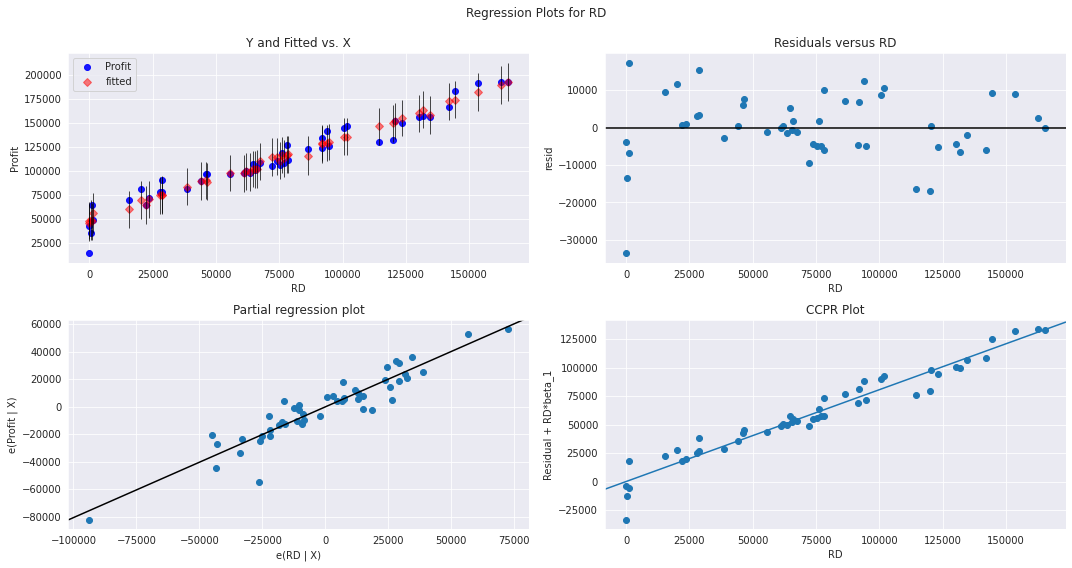

In [115]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "RD", fig=fig)
plt.show()

eval_env: 1


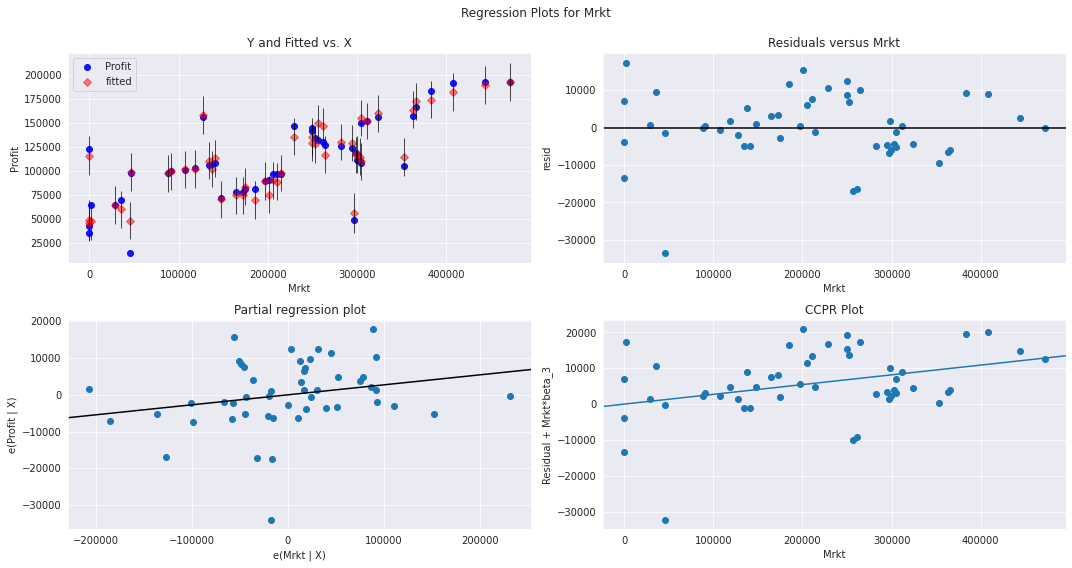

In [116]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Mrkt", fig=fig)
plt.show()

eval_env: 1


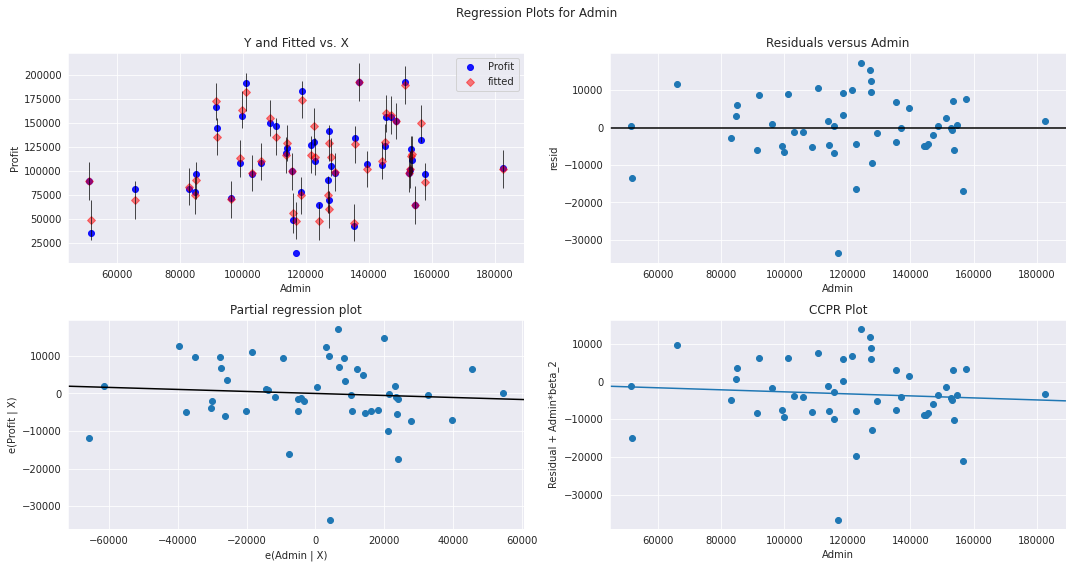

In [117]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Admin", fig=fig)
plt.show()

model deletion diagnostics

detecting outliers/influencers

cooks distance

In [118]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

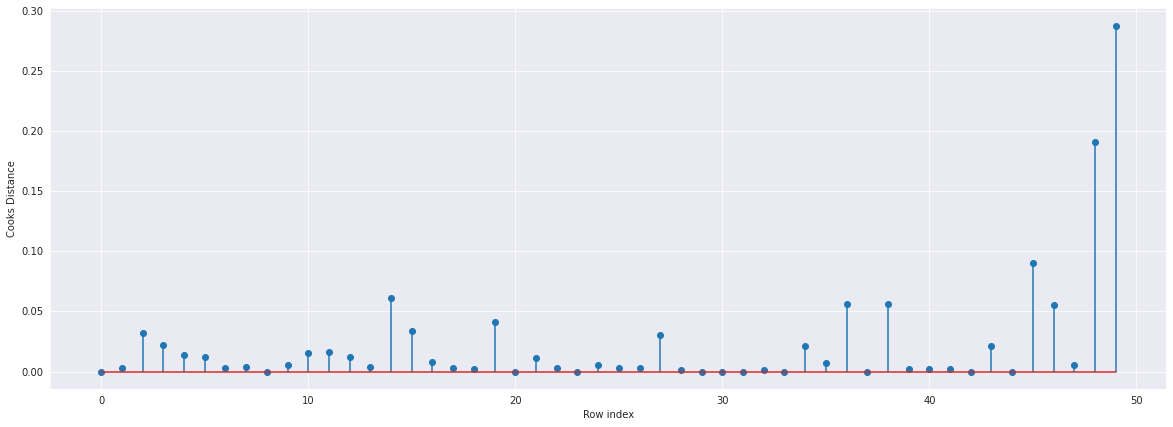

In [119]:
#influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(stup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [120]:
# Index and value of influencer where C>0.5
np.argsort(c) , np.max(c)

(array([31,  0,  8, 30, 37, 44, 29, 33, 42, 23, 20, 32, 28, 39, 40, 41, 18,
         6, 22, 25,  1, 17, 26,  7, 13,  9, 24, 47, 35, 16, 21, 12,  5,  4,
        10, 11, 43, 34,  3, 27,  2, 15, 19, 46, 36, 38, 14, 45, 48, 49]),
 0.2880822927543272)

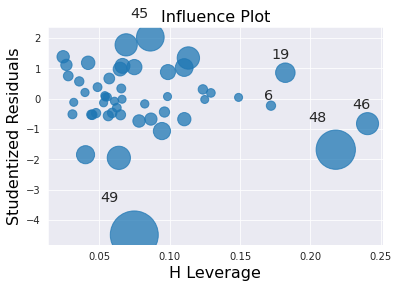

In [121]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [122]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=stup.shape[1]
n=stup.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [127]:
stup_new=stup.copy()
stup1 = stup_new.drop(stup_new.index[[48,49]],axis=0).reset_index()
stup1.shape

(48, 5)

model building

In [128]:
model3 =smf.ols('Profit~RD+Admin+Mrkt',data = stup1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.03e-31
Time:                        12:31:23   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD             0.7895      0.036     21.718      0.000       0.716       0.863
Admin         -0.0633      0.044     -1.442      0.156      -0.152       0.025
Mrkt           0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
model3_influence = model3.get_influence()
(c1, _) = model3_influence.cooks_distance

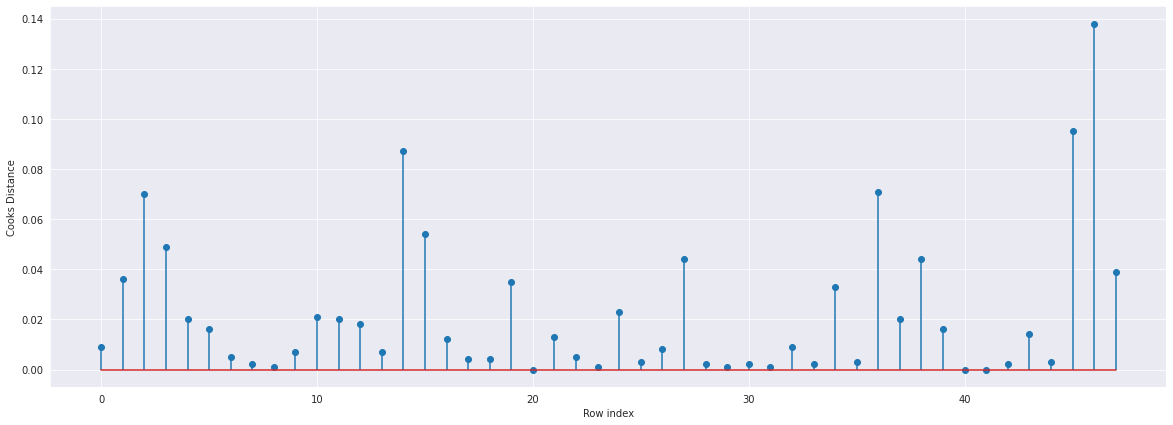

In [132]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [134]:
np.argmax(c1)

46

In [135]:
stup2 = stup1.drop(stup_new.index[[46]],axis=0).reset_index()
stup2.shape

(47, 6)

In [136]:
model4 =smf.ols('Profit~RD+Admin+Mrkt',data = stup2).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.12e-30
Time:                        12:45:49   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
RD             0.7642      0.041     18.704      0.000       0.682       0.847
Admin         -0.0532      0.044     -1.202      0.236      -0.142       0.036
Mrkt           0.0251      0.015      1.696      0.097      -0.005       0.055
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
model4_influence = model4.get_influence()
(c2, _) = model4_influence.cooks_distance

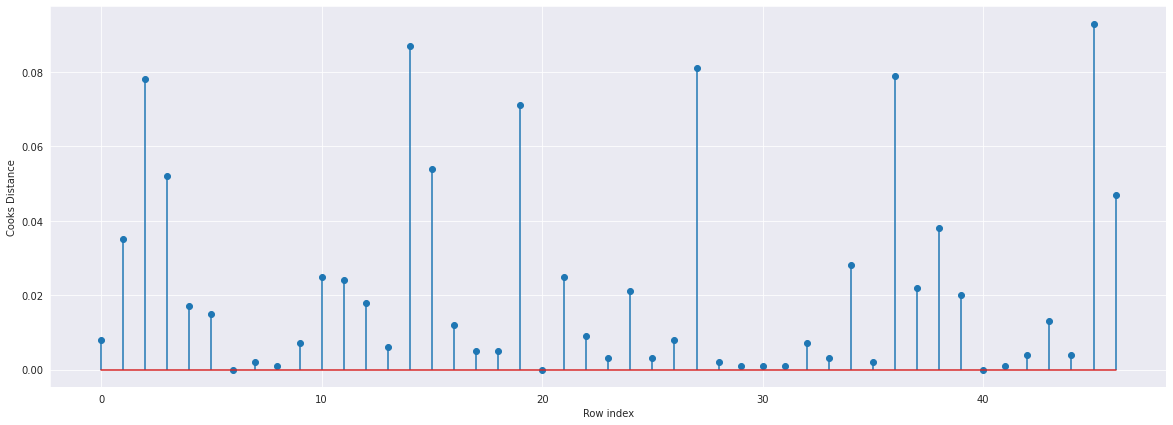

In [138]:
fig = plt.subplots(figsize=(20, 7))
plt.stem( np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

model prediction

In [124]:
new_data=pd.DataFrame({'RD':70000,"Admin":90000,"Mrkt":140000},index=[0])
new_data

,RD,Admin,Mrkt
0,70000,90000,140000


In [139]:
model3.predict(new_data)

0    111027.02823
dtype: float64